In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('8-fraud_detection.csv')

In [3]:
df.head()

,transaction_amount,transaction_risk_score,is_fraud
0,1.879910,-1.485035,0
1,0.377083,-2.238585,0
2,1.354312,-2.664638,0
3,-0.509843,-1.502950,0
4,0.863561,-1.906364,0


In [4]:
df['is_fraud'].value_counts()

is_fraud
0    9846
1     154
Name: count, dtype: int64

In [5]:
#dengesiz bir veri seti

In [6]:
X=df.drop('is_fraud',axis=1)
y=df['is_fraud']

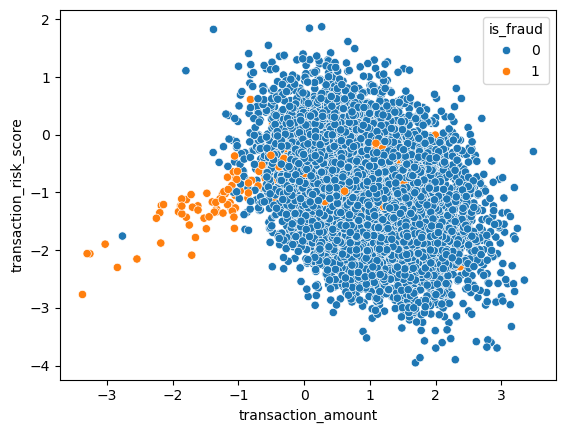

In [7]:
sns.scatterplot(data=df,x='transaction_amount',y='transaction_risk_score',hue=y)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model=LogisticRegression()

In [12]:
penalty=['l1','l2','elasticnet']
c_values=[100,10,0.1,0.01]
solver=['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]   ]
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [13]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 0.1, 0.01],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [14]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV

In [15]:
cv=StratifiedKFold()

In [16]:
gridcv=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy')

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
gridcv.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [19]:
y_pred=gridcv.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [21]:
accuracy_score(y_pred,y_test)

0.9886666666666667

In [22]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2979
           1       0.36      0.81      0.50        21

    accuracy                           0.99      3000
   macro avg       0.68      0.90      0.75      3000
weighted avg       0.99      0.99      0.99      3000



In [23]:
confusion_matrix(y_pred,y_test)

array([[2949,   30],
       [   4,   17]], dtype=int64)

In [24]:
gridcv.best_params_

{'C': 0.01, 'class_weight': {0: 10, 1: 50}, 'penalty': 'l2', 'solver': 'lbfgs'}

In [65]:
model_prob=gridcv.predict_proba(X_test)

In [66]:
model_prob

array([[0.84694907, 0.15305093],
       [0.98719072, 0.01280928],
       [0.87281226, 0.12718774],
       ...,
       [0.96586893, 0.03413107],
       [0.98475587, 0.01524413],
       [0.96005785, 0.03994215]])

In [67]:
model_prob=model_prob[:,1]


In [68]:
model_prob

array([0.15305093, 0.01280928, 0.12718774, ..., 0.03413107, 0.01524413,
       0.03994215])

In [69]:
from sklearn.metrics import roc_auc_score,roc_curve

In [70]:
fpr,tpr,threshold=roc_curve(y_test,model_prob)

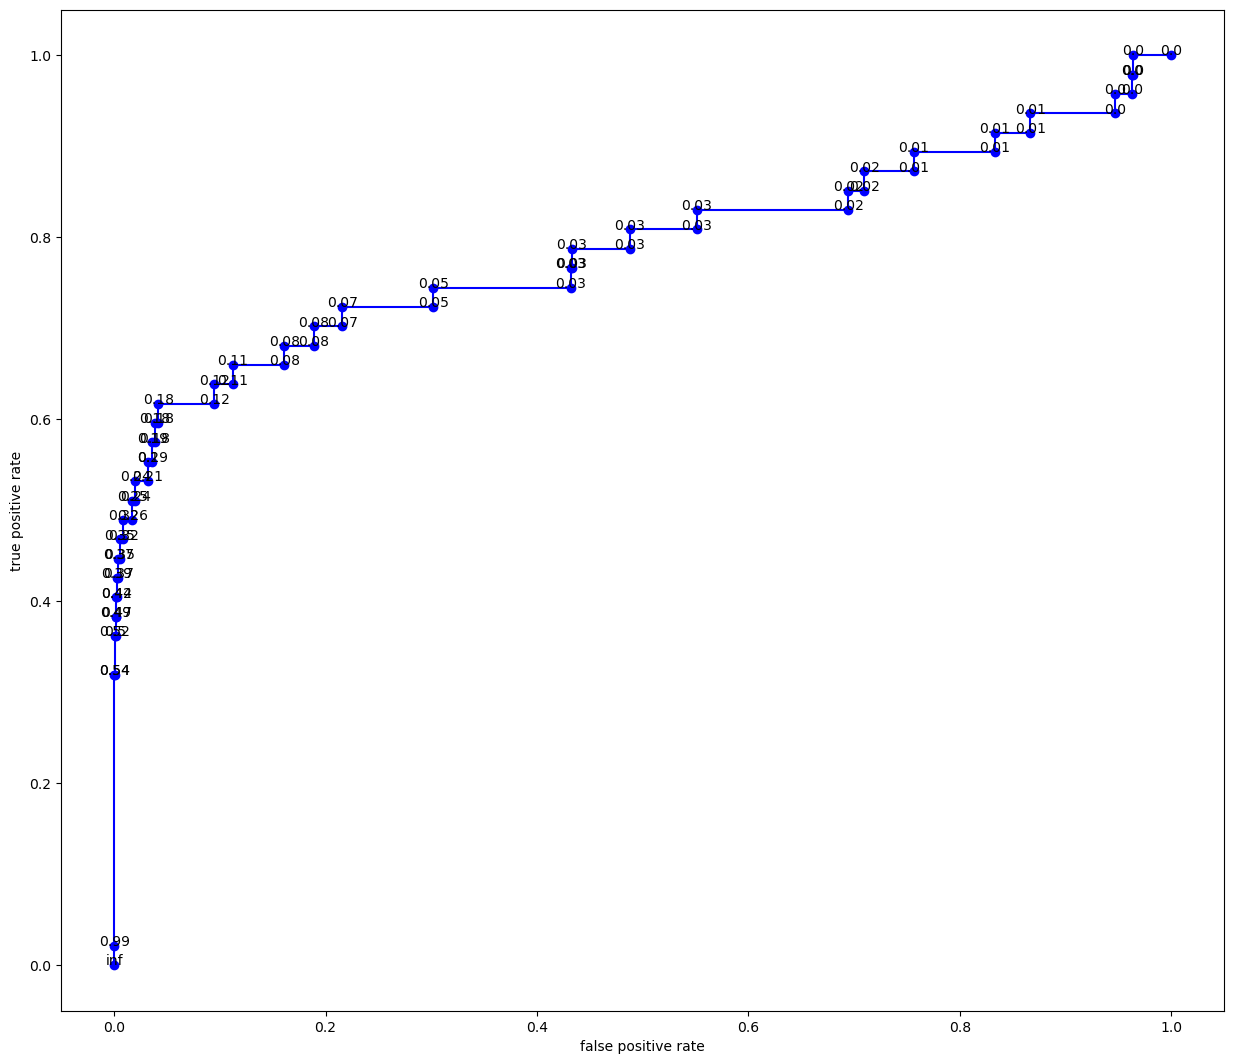

In [71]:
fig,ax=plt.subplots(figsize=(15,13))

ax.plot(fpr,tpr,marker='o',color='blue')
for fpr,tpr,threshold in zip(fpr,tpr,threshold):
    ax.annotate(f'{np.round(threshold,2)}',(fpr,tpr),ha='center')

ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')

plt.show()

In [63]:
roc_auc_score(y_test,model_prob)

0.7888768003689001